<a href="https://www.kaggle.com/code/rahulkotecha/churn-modelling-ann?scriptVersionId=94317915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Churn_Modelling Dataset

This is the dataset used in the section "ANN (Artificial Neural Networks)" of the Udemy course from Kirill Eremenko (Data Scientist & Forex Systems Expert) and Hadelin de Ponteves (Data Scientist), called Deep Learning A-Z™: Hands-On Artificial Neural Networks. The dataset is very useful for beginners of Machine Learning, and a simple playground where to compare several techniques/skills.

It can be freely downloaded here: https://www.superdatascience.com/deep-learning/


The story:
A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

The story of the story:
I'd like to compare several techniques (better if not alone, and with the experience of several Kaggle users) to improve my basic knowledge on Machine Learning.

Content
I will write more later, but the columns names are very self-explaining.

Acknowledgements
Udemy instructors Kirill Eremenko (Data Scientist & Forex Systems Expert) and Hadelin de Ponteves (Data Scientist), and their efforts to provide this dataset to their students.

Inspiration
Which methods score best with this dataset? Which are fastest (or, executable in a decent time)? Which are the basic steps with such a simple dataset, very useful to beginners?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../input/deep-learning-az-ann/Churn_Modelling.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [6]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [9]:
df.describe(include=["object"])

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

In [10]:
df_cat=df.select_dtypes(["object"])
df_num=df.select_dtypes(["float64","int64"])

In [11]:
df_cat.head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

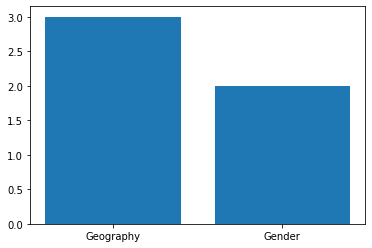

In [12]:
plt.figure()
plt.bar(df_cat.columns,df_cat.nunique())
plt.show()

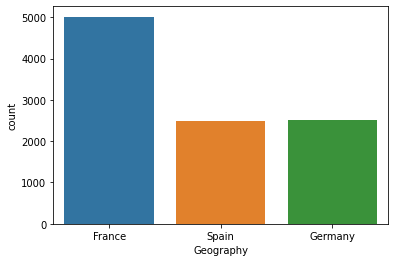

In [13]:
sns.countplot(df["Geography"])
plt.show()

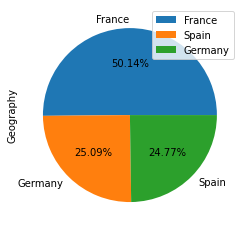

In [14]:
df["Geography"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.legend(df["Geography"].unique())
plt.show()

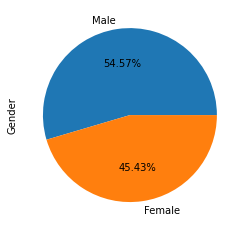

In [15]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_cat[["Geography","Gender"]]=oe.fit_transform(df_cat)

In [17]:
df_cat.head()

Geography  Gender
0        0.0     0.0
1        2.0     0.0
2        0.0     0.0
3        0.0     0.0
4        2.0     0.0

In [18]:
oe.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [19]:
df_num.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

In [20]:
from scipy.stats import skew

CreditScore
Skewness: -0.07159586676212397


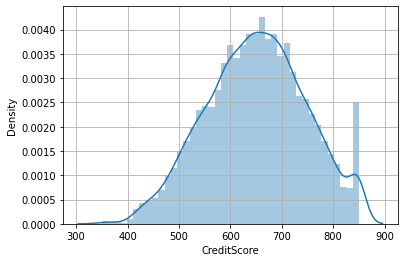

Age
Skewness: 1.0111685586628079


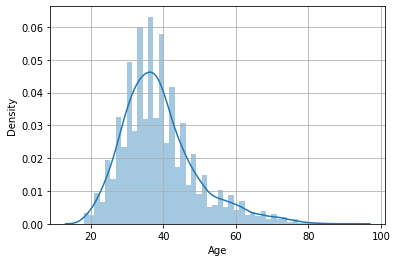

Tenure
Skewness: 0.010989809189781041


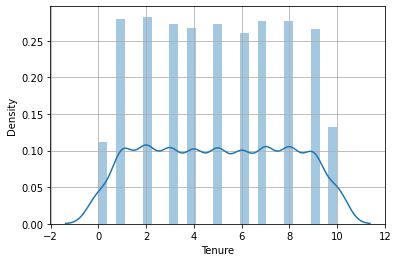

Balance
Skewness: -0.14108754375291138


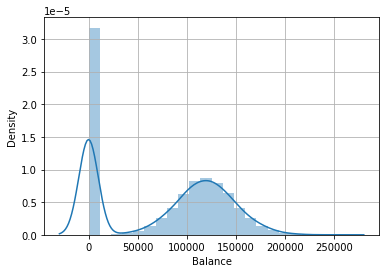

NumOfProducts
Skewness: 0.745456048438949


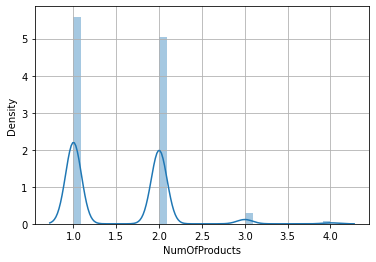

HasCrCard
Skewness: -0.9016763178640548


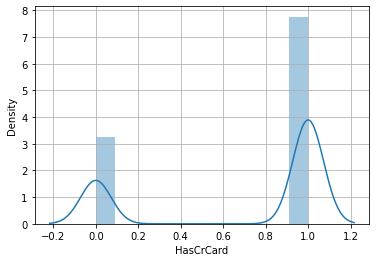

IsActiveMember
Skewness: -0.06042756246298516


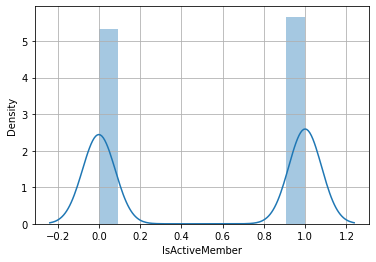

EstimatedSalary
Skewness: 0.0020850448448748848


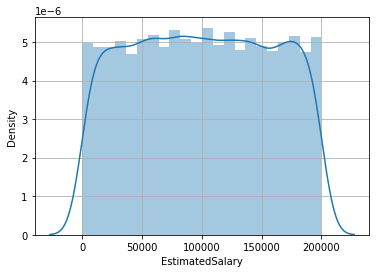

Exited
Skewness: 1.4713899141398699


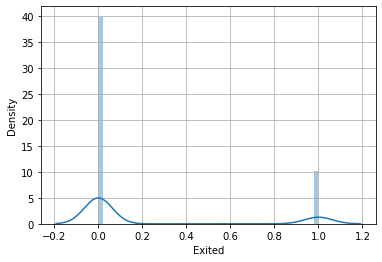

In [21]:
for col in df_num:
    print(col)
    print(f"Skewness: {skew(df_num[col])}")
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.grid(True)
    plt.show()

CreditScore
AxesSubplot(0.125,0.125;0.775x0.755)


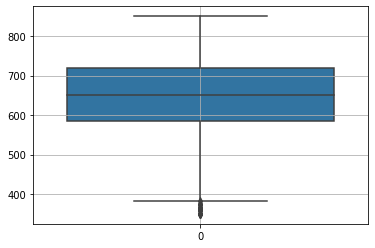

Age
AxesSubplot(0.125,0.125;0.775x0.755)


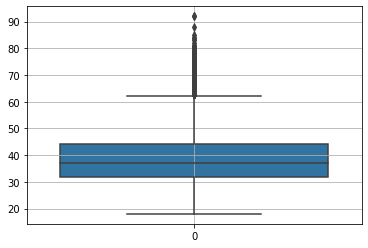

Tenure
AxesSubplot(0.125,0.125;0.775x0.755)


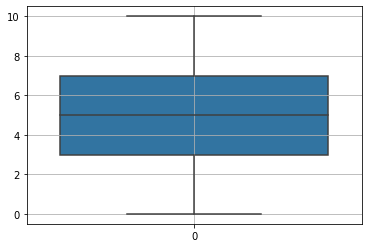

Balance
AxesSubplot(0.125,0.125;0.775x0.755)


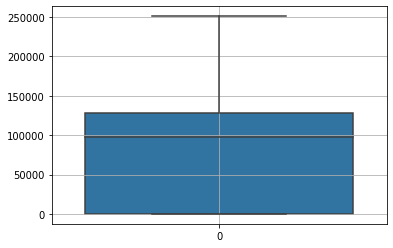

NumOfProducts
AxesSubplot(0.125,0.125;0.775x0.755)


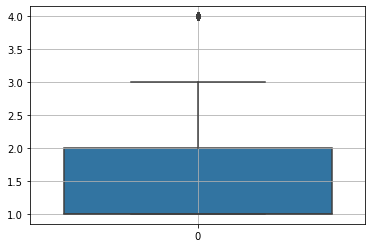

HasCrCard
AxesSubplot(0.125,0.125;0.775x0.755)


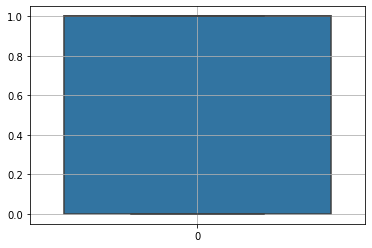

IsActiveMember
AxesSubplot(0.125,0.125;0.775x0.755)


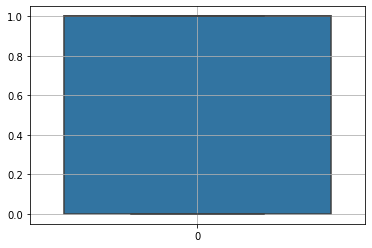

EstimatedSalary
AxesSubplot(0.125,0.125;0.775x0.755)


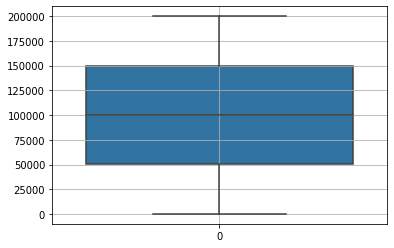

Exited
AxesSubplot(0.125,0.125;0.775x0.755)


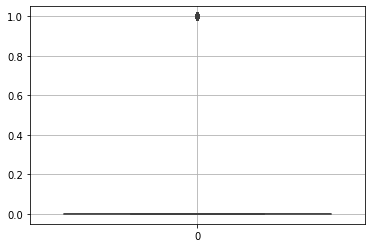

In [22]:
for col in df_num:
    print(col)
    print(sns.boxplot(data=df_num[col]))
    plt.grid(True)
    plt.show()

In [23]:
df_num.corr()["Exited"].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [24]:
df=pd.concat([df_cat,df_num],axis=1)

In [25]:
df.head()

Geography  Gender  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0        0.0     0.0          619   42       2       0.00              1   
1        2.0     0.0          608   41       1   83807.86              1   
2        0.0     0.0          502   42       8  159660.80              3   
3        0.0     0.0          699   39       1       0.00              2   
4        2.0     0.0          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [26]:
df.corr()

Geography    Gender  CreditScore       Age    Tenure  \
Geography         1.000000  0.004719     0.007888  0.022812  0.003739   
Gender            0.004719  1.000000    -0.002857 -0.027544  0.014733   
CreditScore       0.007888 -0.002857     1.000000 -0.003965  0.000842   
Age               0.022812 -0.027544    -0.003965  1.000000 -0.009997   
Tenure            0.003739  0.014733     0.000842 -0.009997  1.000000   
Balance           0.069408  0.012087     0.006268  0.028308 -0.012254   
NumOfProducts     0.003972 -0.021859     0.012238 -0.030680  0.013444   
HasCrCard        -0.008523  0.005766    -0.005458 -0.011721  0.022583   
IsActiveMember    0.006724  0.022544     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.001369 -0.008112    -0.001384 -0.007201  0.007784   
Exited            0.035943 -0.106512    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Geography        0.069408       0.003972  -0.008523        0.006724   
Gender           0.012087      -0.021859   0.005766        0.022544   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
Geography              -0.001369  0.035943  
Gender                 -0.008112 -0.106512  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

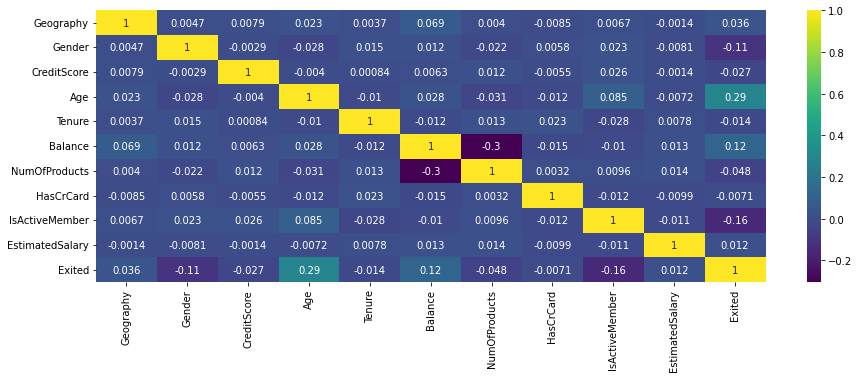

In [27]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

In [28]:
df.columns

Index(['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
x=df.iloc[ : , :-1]
x.head()

Geography  Gender  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0        0.0     0.0          619   42       2       0.00              1   
1        2.0     0.0          608   41       1   83807.86              1   
2        0.0     0.0          502   42       8  159660.80              3   
3        0.0     0.0          699   39       1       0.00              2   
4        2.0     0.0          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [30]:
y=df.iloc[ : ,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2373
           1       0.63      0.38      0.47       627

    accuracy                           0.82      3000
   macro avg       0.74      0.66      0.68      3000
weighted avg       0.81      0.82      0.81      3000



In [36]:
accuracy_score(ytest,ypred)

0.8243333333333334

In [37]:
confusion_matrix(ytest,ypred)

array([[2237,  136],
       [ 391,  236]])

#### Hyper-Parameter Tuning

In [38]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

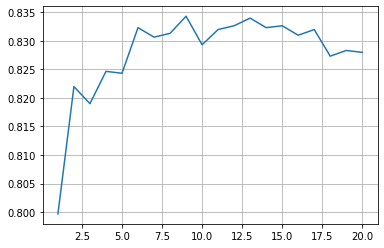

In [39]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [40]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2373
           1       0.72      0.34      0.46       627

    accuracy                           0.83      3000
   macro avg       0.78      0.65      0.68      3000
weighted avg       0.82      0.83      0.81      3000



In [42]:
accuracy_score(ytest,ypred)

0.8343333333333334

In [43]:
confusion_matrix(ytest,ypred)

array([[2288,   85],
       [ 412,  215]])

#### Cross Validation Score

In [44]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.782  0.7885 0.7855 0.7795 0.783 ]
CVS Mean: 0.7837
CVS Standard Deviation: 0.0030757112998459337


#### Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2373
           1       0.70      0.32      0.44       627

    accuracy                           0.83      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.81      0.83      0.80      3000



In [47]:
accuracy_score(ytest,ypred)

0.8296666666666667

In [48]:
confusion_matrix(ytest,ypred)

array([[2289,   84],
       [ 427,  200]])

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.64      0.19      0.30       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [51]:
accuracy_score(ytest,ypred)

0.8086666666666666

In [52]:
confusion_matrix(ytest,ypred)

array([[2305,   68],
       [ 506,  121]])

#### Hyper-Parameter Tuning

In [53]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [54]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [55]:
grid.best_score_

0.8092857142857144

In [56]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [57]:
grid.best_estimator_

LogisticRegression(solver='liblinear')

In [58]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.64      0.20      0.30       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.78      0.81      0.77      3000



In [60]:
accuracy_score(ytest,ypred)

0.8093333333333333

In [61]:
confusion_matrix(ytest,ypred)

array([[2305,   68],
       [ 504,  123]])

#### Cross Validation Score

In [62]:
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.79   0.7905 0.792  0.789  0.7865]
CVS Mean: 0.7896000000000001
CVS Standard Deviation: 0.0018275666882497216


#### Bagging

In [63]:
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.63      0.19      0.29       627

    accuracy                           0.81      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



In [65]:
accuracy_score(ytest,ypred)

0.807

In [66]:
confusion_matrix(ytest,ypred)

array([[2303,   70],
       [ 509,  118]])

# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [68]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2373
           1       0.81      0.23      0.36       627

    accuracy                           0.83      3000
   macro avg       0.82      0.61      0.63      3000
weighted avg       0.83      0.83      0.79      3000



In [69]:
accuracy_score(ytest,ypred)

0.8276666666666667

In [70]:
confusion_matrix(ytest,ypred)

array([[2340,   33],
       [ 484,  143]])

#### Cross Validation Score

In [71]:
cvs=cross_val_score(nb,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.782  0.7815 0.788  0.785  0.7815]
CVS Mean: 0.7836
CVS Standard Deviation: 0.002557342370508905


#### Bagging

In [72]:
bg=BaggingClassifier(nb)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [73]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2373
           1       0.82      0.23      0.36       627

    accuracy                           0.83      3000
   macro avg       0.82      0.61      0.63      3000
weighted avg       0.83      0.83      0.79      3000



In [74]:
accuracy_score(ytest,ypred)

0.8286666666666667

In [75]:
confusion_matrix(ytest,ypred)

array([[2340,   33],
       [ 481,  146]])

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [77]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2373
           1       0.53      0.54      0.53       627

    accuracy                           0.80      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.80      0.80      0.80      3000



In [78]:
accuracy_score(ytest,ypred)

0.8023333333333333

In [79]:
confusion_matrix(ytest,ypred)

array([[2066,  307],
       [ 286,  341]])

#### Hyper-Parameter Tuning

Criterion-->"GINI"

In [80]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.8556666666666667 7


In [81]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.853 25


Criterion-->"ENTROPY"

In [82]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.854 5


In [83]:
s=0
for i in range(1,51):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.859 25


In [84]:
dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=25)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [85]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2373
           1       0.76      0.47      0.58       627

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [86]:
accuracy_score(ytest,ypred)

0.859

In [87]:
confusion_matrix(ytest,ypred)

array([[2282,   91],
       [ 332,  295]])

#### Tree

In [88]:
from sklearn import tree

In [89]:
fig, ax= plt.subplots(figsize=(150,150))
chart=tree.plot_tree(dt, feature_names=df.columns, fontsize=13, filled=True, rounded=True)

for node in chart:
    arrow=node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(5)

#### Cross Validation Score

In [90]:
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.844 0.858 0.85  0.866 0.85 ]
CVS Mean: 0.8535999999999999
CVS Standard Deviation: 0.007631513611335572


#### Bagging

In [91]:
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [92]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2373
           1       0.78      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [93]:
accuracy_score(ytest,ypred)

0.86

In [94]:
confusion_matrix(ytest,ypred)

array([[2289,   84],
       [ 336,  291]])

# Random Forest 

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [96]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.45      0.58       627

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [97]:
accuracy_score(ytest,ypred)

0.8616666666666667

In [98]:
confusion_matrix(ytest,ypred)

array([[2300,   73],
       [ 342,  285]])

#### Cross Validation Score

In [99]:
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8595 0.8695 0.856  0.8615 0.858 ]
CVS Mean: 0.8609
CVS Standard Deviation: 0.004662617290749929


# Support Vector Classifier

In [100]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [101]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2373
           1       0.83      0.39      0.53       627

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.83      3000



In [102]:
accuracy_score(ytest,ypred)

0.8556666666666667

In [103]:
confusion_matrix(ytest,ypred)

array([[2322,   51],
       [ 382,  245]])

In [104]:
svc=SVC(kernel="linear")
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [105]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2373
           1       0.00      0.00      0.00       627

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



In [106]:
accuracy_score(ytest,ypred)

0.791

In [107]:
confusion_matrix(ytest,ypred)

array([[2373,    0],
       [ 627,    0]])

#### Hyper-Parameter Tuning

In [108]:
params={
    "C": np.logspace(-3,3,7),
    "kernel": ["rbf"]
}

In [109]:
grid=GridSearchCV(svc,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.799 total time=   0.8s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.799 total time=   0.9s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.799 total time=   0.8s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.799 total time=   0.8s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.799 total time=   0.9s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.799 total time=   0.9s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.799 total time=   0.9s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.799 total time=   0.9s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.799 total time=   0.9s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.799 total time=   0.9s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.821 total time=   0.9s
[CV 2/5] END .................C=0.1, kernel=rbf;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'kernel': ['rbf']},
             verbose=3)

In [110]:
grid.best_score_

0.8535714285714284

In [111]:
grid.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [112]:
grid.best_estimator_

SVC()

In [113]:
svc=grid.best_estimator_
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)

In [114]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2373
           1       0.83      0.39      0.53       627

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.83      3000



In [115]:
accuracy_score(ytest,ypred)

0.8556666666666667

In [116]:
confusion_matrix(ytest,ypred)

array([[2322,   51],
       [ 382,  245]])

#### Cross Validation Score

In [117]:
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.8585 0.87   0.857  0.8605 0.857 ]
CVS Mean: 0.8606
CVS Standard Deviation: 0.004872371086031933


#### Bagging

In [118]:
bg=BaggingClassifier(svc)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [119]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2373
           1       0.84      0.40      0.54       627

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



In [120]:
accuracy_score(ytest,ypred)

0.858

In [121]:
confusion_matrix(ytest,ypred)

array([[2326,   47],
       [ 379,  248]])

# Voting Classifier

In [122]:
models=[]
models.append(("KNN",KNeighborsClassifier()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("SVC",SVC()))

In [123]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [124]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2373
           1       0.87      0.32      0.47       627

    accuracy                           0.85      3000
   macro avg       0.86      0.65      0.69      3000
weighted avg       0.85      0.85      0.82      3000



In [125]:
accuracy_score(ytest,ypred)

0.8483333333333334

In [126]:
confusion_matrix(ytest,ypred)

array([[2343,   30],
       [ 425,  202]])

# Boosting

###### Ada Boosting

In [127]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.75      0.48      0.59       627

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [128]:
accuracy_score(ytest,ypred)

0.8586666666666667

In [129]:
confusion_matrix(ytest,ypred)

array([[2275,   98],
       [ 326,  301]])

###### Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.80      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.84      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000



In [131]:
accuracy_score(ytest,ypred)

0.863

In [132]:
confusion_matrix(ytest,ypred)

array([[2303,   70],
       [ 341,  286]])

###### XG Boosting

In [133]:
from xgboost import XGBClassifier
xbc=XGBClassifier()
xbc.fit(xtrain,ytrain)
ypred=xbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2373
           1       0.74      0.51      0.60       627

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [134]:
accuracy_score(ytest,ypred)

0.8606666666666667

In [135]:
confusion_matrix(ytest,ypred)

array([[2264,  109],
       [ 309,  318]])

# Deep Learning- Artificial Neural Network

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [137]:
ann=Sequential()

ann.add(Dense(units=10,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
ann.fit(xtrain,ytrain,epochs=800,batch_size=100,validation_data=(xtest,ytest))

2022-04-29 10:42:42.083975: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-29 10:42:42.209120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/800
70/70 [==============================] - 1s 5ms/step - loss: 1.1507 - accuracy: 0.2093 - val_loss: 0.9051 - val_accuracy: 0.2450
Epoch 2/800
70/70 [==============================] - 0s 2ms/step - loss: 0.8099 - accuracy: 0.3639 - val_loss: 0.7336 - val_accuracy: 0.5180
Epoch 3/800
70/70 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.6201 - val_loss: 0.6699 - val_accuracy: 0.7013
Epoch 4/800
70/70 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.7466 - val_loss: 0.6365 - val_accuracy: 0.7690
Epoch 5/800
70/70 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.7873 - val_loss: 0.6054 - val_accuracy: 0.7890
Epoch 6/800
70/70 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7961 - val_loss: 0.5597 - val_accuracy: 0.7910
Epoch 7/800
70/70 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7984 - val_loss: 0.5244 - val_accuracy: 0.7910
Epoch 8/800
7

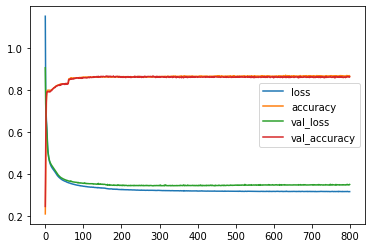

In [138]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [139]:
ann=Sequential()

ann.add(Dense(units=10,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [140]:
from tensorflow.keras.callbacks import EarlyStopping

In [141]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",patience=100,verbose=2)

In [142]:
ann.fit(xtrain,ytrain,epochs=800,batch_size=100,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/800
70/70 [==============================] - 1s 5ms/step - loss: 0.6691 - accuracy: 0.7007 - val_loss: 0.6362 - val_accuracy: 0.7790
Epoch 2/800
70/70 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7984 - val_loss: 0.5576 - val_accuracy: 0.7930
Epoch 3/800
70/70 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.8036 - val_loss: 0.5054 - val_accuracy: 0.7967
Epoch 4/800
70/70 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.8067 - val_loss: 0.4750 - val_accuracy: 0.8047
Epoch 5/800
70/70 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8101 - val_loss: 0.4568 - val_accuracy: 0.8087
Epoch 6/800
70/70 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8110 - val_loss: 0.4470 - val_accuracy: 0.8067
Epoch 7/800
70/70 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8123 - val_loss: 0.4398 - val_accuracy: 0.8083
Epoch 8/800
7

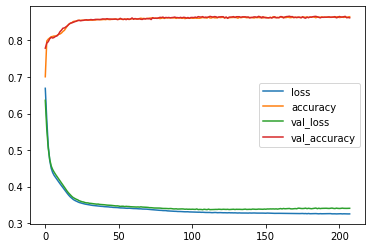

In [143]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

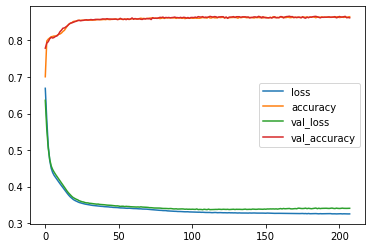

In [144]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()
plt.show()

In [145]:
ypred=ann.predict(xtest)

In [146]:
ypred=ypred>0.5

In [147]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2373
           1       0.76      0.50      0.60       627

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [148]:
accuracy_score(ytest,ypred)

0.862

In [149]:
confusion_matrix(ytest,ypred)

array([[2275,   98],
       [ 316,  311]])

# SUMMARY

###### The Accuracy achieved per model is as follows:

Model name: KNN
    - Initial Accuracy: 82.43%,
    - Accuracy Post Hyper-parameter Tuning: 83.43%,
    - Cross Validation Score: 78.37%,
    - Bagging Accuracy: 82.83%,
    - Best Accuracy Achieved: 83.43%
        
        
Model name: Logistic Regression
    - Initial Accuracy: 80.86%,
    - Accuracy Post Hyper-parameter Tuning: 80.93%,
    - Cross Validation Score: 78.96%,
    - Bagging Accuracy: 80.73%,
    - Best Accuracy Achieved: 80.93%

        
Model name: Naive Bayes
    - Initial Accuracy: 82.76%,
    - Cross Validation Score: 78.36%,
    - Bagging Accuracy: 82.76%,    
    - Best Accuracy Achieved: 82.76%

        
Model name: Decision Tree
    - Initial Accuracy: 80.13%,
    - Accuracy Post Hyper-parameter Tuning: 85.93%,
        Criterion "GINI"
        Max depth Tuning Accuracy: 85.53%,
        Min samples leaf Tuning Accuracy: 85.3%,
    Criterion "ENTROPY"
        Max depth Tuning Accuracy: 85.4%,
        Min samples leaf Tuning Accuracy: 85.93%,
    - Cross Validation Score: 85.41%,
    - Bagging Accuracy: 80.40%,
    - Best Accuracy Achieved: 85.93%

        
Model name: Random Forest
    - Initial Accuracy: 85.93%,
    - Cross Validation Score: 86.15%,
    - Best Accuracy Achieved: 85.93%
        

Model name: Support Vector Classifier
    - Initial Accuracy: 
        Kernel "rbf"- 85.56%,
        Kernel "linear"- 79.10%,
    - Accuracy Post Hyper-parameter Tuning: 85.56%,
    - Cross Validation Score: 86.12%,
    - Bagging Accuracy: 85.4%,
    - Best Accuracy Achieved: 85.56%
        
        
Voting Classifier Accuracy: 84.63%


Boosting:
    - Ada Boosting: 85.86%,
    - Gradient Boosting: 86.30%,
    - XG Boosting: 86.06%,
    
    
Deep Learning- Artificial Neural Network
    - Best Accuracy: 85%